# Feature engineering with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>


## The machine learning pipeline

Machine learning models expect numeric arrays, but data in the real world is in many different forms...


![so we need to go from one to the other!](https://blog.dominodatalab.com/wp-content/uploads/2018/08/Casari-Feature-Eng-Image-2-768x433.png)

From [Feature engineering with Python](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/)

## Let's play!

We will try to guess a players' position

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
pd.options.display.max_columns = None

In [7]:
df = pd.read_csv('players_20.csv', index_col=0)
df.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,

https://fifafootballvideogames.fandom.com/wiki/Soccer_positions

So, to begin with, we need to extract a target feature.

In [9]:
df['team_position'].value_counts()

SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
LAM      23
RAM      23
LF       19
RF       19
CF       14
Name: team_position, dtype: int64

In [13]:
starter = df[~df['team_position'].isin(['RES','SUB'])]

In [15]:
target = starter['team_position'].isin(['DM','RW','LW','LM','RM','CM','AM'])
# This is my target in the classifier model
target.value_counts()

False    6304
True     1196
Name: team_position, dtype: int64

### Do a first approximation to use as baseline

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [93]:
def run_model(features, target, categories=None, classifier=LogisticRegression(), preprocessor=StandardScaler(), encoder=OneHotEncoder(handle_unknown='ignore')):
       
    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(features, target)
    
    # Split type of columns
    X_train_numeric = X_train.select_dtypes('number')
    X_train_numeric = X_train_numeric.fillna(numeric.median())
    X_test_numeric = X_test.select_dtypes('number')
    X_test_numeric = X_test_numeric.fillna(numeric.median())
    if categories is not None and len(categories) > 0:
        X_train_categorical = X_train[categories]
        X_test_categorical = X_test[categories]
    
    # Scaling
    if preprocessor is not None:
        X_train_numeric = preprocessor.fit_transform(X_train_numeric)
        X_test_numeric = preprocessor.transform(X_test_numeric)
    
    # Encoding
    if encoder is not None:
        X_train_categorical = encoder.fit_transform(X_train_categorical)
        X_test_categorical = encoder.transform(X_test_categorical)
    
    if categories is not None and len(categories) > 0:
        X_train = np.concatenate([X_train_numeric, X_train_categorical.todense()], axis=1)
        X_test = np.concatenate([X_test_numeric, X_test_categorical.todense()], axis=1)
    else:
        X_train = X_train_numeric
        X_test = X_test_numeric
    
    # Model train
    classifier.fit(X_train, y_train)

    # Predict
    y_pred = classifier.predict(X_test)
    y_pred_probs = classifier.predict_proba(X_test)[:, 1]
    
    # Evaluate
    tpr, fpr, threshold = roc_curve(y_test, y_pred_probs)
    plt.plot(tpr, fpr);

    # Metrics
    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), roc_auc_score(y_test, y_pred_probs)

/Users/je637620/Documents/VirtualEnv/jupyter/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8517333333333333, 0.0, 0.0, 0.5348269912560871)

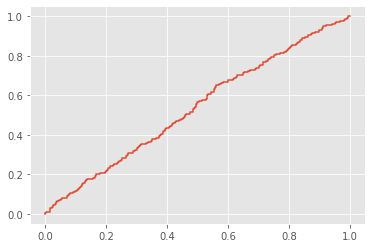

In [88]:
numeric = starter.select_dtypes('number')
features = numeric.fillna(numeric.median())

run_model(features, target, None, LogisticRegression(), None, None)

In [78]:
# Even though accuracy is quite good, precision and recall is not, what means high false positives and false negatives
# There are 3 characteristics that impacts our model due to scale

/Users/je637620/Documents/VirtualEnv/jupyter/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.888, 0.6984924623115578, 0.4809688581314879, 0.9133268172635125)

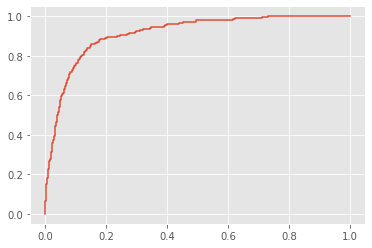

In [89]:
numeric = starter.select_dtypes('number').drop(['wage_eur', 'value_eur', 'release_clause_eur'], axis=1)
features = numeric.fillna(numeric.median())

run_model(features, target, None, LogisticRegression(), None, None)

/Users/je637620/Documents/VirtualEnv/jupyter/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8634666666666667,
 0.6284403669724771,
 0.4391025641025641,
 0.8875006151877552)

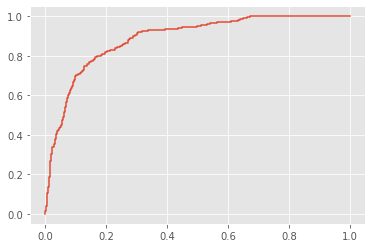

In [90]:
# We can include the scaler
numeric = starter.select_dtypes('number')
features = numeric.fillna(numeric.median())

run_model(features, target, None, LogisticRegression(), StandardScaler(), None)

## Categorical variables

`nationality`, `club`

### One hot

![One Hot Encoding](https://hackernoon.com/photos/4HK5qyMbWfetPhAavzyTZrEb90N2-3o23tie)


In [73]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

encoder.fit(starter['club'].head(10).values.reshape(-1,1))
encoder.categories_

[array(['Atlético Madrid', 'FC Barcelona', 'Juventus', 'Liverpool',
        'Manchester City', 'Paris Saint-Germain', 'Real Madrid'],
       dtype=object)]

In [74]:
sparsed = encoder.transform(starter['club'].head(10).values.reshape(-1,1))
# Sparse matrix is a matrix which contains very few non-zero elements. When a sparse matrix is represented with a 2-dimensional array, we waste a lot of space to represent that matrix
sparsed.todense()

matrix([[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0.]])

In [75]:
# This matrix cannot be subect to scalers
StandardScaler().fit_transform(sparsed.todense())

array([[-0.33333333,  2.        , -0.33333333, -0.5       , -0.33333333,
        -0.33333333, -0.5       ],
       [-0.33333333, -0.5       ,  3.        , -0.5       , -0.33333333,
        -0.33333333, -0.5       ],
       [-0.33333333, -0.5       , -0.33333333, -0.5       , -0.33333333,
         3.        , -0.5       ],
       [ 3.        , -0.5       , -0.33333333, -0.5       , -0.33333333,
        -0.33333333, -0.5       ],
       [-0.33333333, -0.5       , -0.33333333, -0.5       , -0.33333333,
        -0.33333333,  2.        ],
       [-0.33333333, -0.5       , -0.33333333, -0.5       ,  3.        ,
        -0.33333333, -0.5       ],
       [-0.33333333,  2.        , -0.33333333, -0.5       , -0.33333333,
        -0.33333333, -0.5       ],
       [-0.33333333, -0.5       , -0.33333333,  2.        , -0.33333333,
        -0.33333333, -0.5       ],
       [-0.33333333, -0.5       , -0.33333333, -0.5       , -0.33333333,
        -0.33333333,  2.        ],
       [-0.33333333, -0.5   

In [ ]:
encoder

This would work okay, but what about nationalities?

/Users/je637620/Documents/VirtualEnv/jupyter/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8837333333333334,
 0.6652542372881356,
 0.5304054054054054,
 0.8912179278708726)

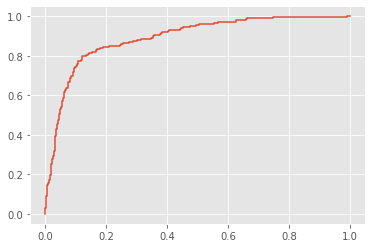

In [94]:
# We can include the Encoder
run_model(starter, target, ['nationality','club'], LogisticRegression(), StandardScaler(), OneHotEncoder(handle_unknown='ignore'))

### Target encoding

Also known as bin counting


With high cardinality discrete data like user_ids we would be left with many variables by one hot encoding, most of which would not be very informative. There are [several options](https://www.datacamp.com/community/tutorials/encoding-methodologies) to deal with this. The most sophisticated is probably vector encoding, but we can do with a very simple approach: [target encoding](https://maxhalford.github.io/blog/target-encoding/).


## Text

You will learn a lot more in the NLP and Deep Learning sections, but let me show you a few basics.

### The lame approach

`work_rate`

### Bag-of-words

`player_traits`

`player_tags`

### Vector encodings for more than text


## Numerical variables

### Dealing with counts and money

Download https://www.kaggle.com/fernandol/countries-of-the-world

### Scaling

Compare `age`, `height_cm`, `weight_kg` with the skill variables. What if we applied a KNN or a PCA?

### Interaction features

Very useful for linear models. Decision models already have them for free.

A linear model will do a terrible job fitting data that has nonlinearities: logs, multiplications, etc.

We can give it a hand by adding nonlinear features:

In sklearn:

## Putting it all together with `sklearn` Pipelines 

For:

1. Convenience

2. Joint parameter selection

### And now the magic

https://scikit-learn.org/stable/modules/model_evaluation.html

### Target encoding in `sklearn` pipelines

There is no target encoder estimator in sklearn. We can install an additional library or, even more fun, roll our own!

This is how you install the additional library:

```bash
!conda install -c conda-forge category_encoders
```

Then:

## Further reading


[Feature Engineering for Machine Learning](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235): a great book covering all the basics.

[Why is feature scaling required?](https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310)

[When to standardize?](https://statmodeling.stat.columbia.edu/2009/07/11/when_to_standar/)

[Representing Categorical Data with Target Encoding](https://brendanhasz.github.io/2019/03/04/target-encoding)


[A Simple Guide to Scikit-learn Pipelines](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf)

[scikit-learn for developers](https://scikit-learn.org/stable/developers/develop.html)

[The Categorical Encoders library](https://contrib.scikit-learn.org/category_encoders/)

[Creating your own estimator in scikit-learn](http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/)